## 实现原理
```jupyterpython
import  numpy as np
x = np.array([10, 7, 4, 3, 2, 1])
x = sorted(x) # 排序
N = len(x) - 1
P = 10
floor1 = int(np.floor(N/100*P)) # 下限
ceil1 = int(np.ceil(N/100*P)) #上限
if floor1 == ceil1: # 若下限等于上限，则下限-=1
    floor1 -= 1
P_n = x[floor1] + (x[ceil1] - x[floor1]) * (N/100*P-floor1) # 等价于np.percentile(x, 10)
print(P_n)
```

In [1]:
import  numpy as np
import matplotlib.pyplot as plt

In [2]:
a1 = np.array([[10, 7, 4], [3, 2, 1]])
a1

array([[10,  7,  4],
       [ 3,  2,  1]])

In [7]:
'''
q : array_like of float
    Percentile or sequence of percentiles to compute, which must be between
    0 and 100 inclusive.
'''
np.percentile(a1, q=100) # 默认axis=None

10.0

In [4]:
np.percentile(a1, 10, axis=0)

array([3.7, 2.5, 1.3])

In [5]:
np.percentile(a1, 10, axis=1)

array([4.6, 1.2])

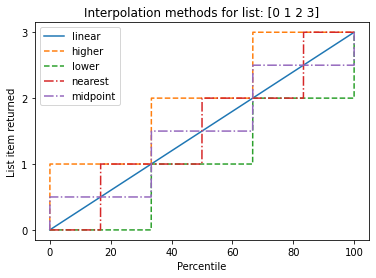

In [6]:
a = np.arange(4)
p = np.linspace(0, 100, 6001)
ax = plt.gca() 
lines = [
    ('linear', None),
    ('higher', '--'),
    ('lower', '--'),
    ('nearest', '-.'),
    ('midpoint', '-.'),
]
for interpolation, style in lines:
    ax.plot(
        p, np.percentile(a, p, interpolation=interpolation), #计算沿指定轴的数据的第q个百分位数
        label=interpolation, linestyle=style)
    '''
    interpolation : {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
        This optional parameter specifies the interpolation method to use when the desired 
        percentile lies between two data points i < j:

        ‘linear’: i + (j - i) * fraction, where fraction is the fractional part of the index 
         surrounded by i and j.
        ‘lower’: i.
        ‘higher’: j.
        ‘nearest’: i or j, whichever is nearest.
        ‘midpoint’: (i + j) / 2.
    '''
ax.set(
    title='Interpolation methods for list: ' + str(a),
    xlabel='Percentile',
    ylabel='List item returned',
    yticks=a)
ax.legend()
plt.show()